## 線形回帰スクラッチ
線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。

雛形
```
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        pass
        return
```

In [1]:
import numpy as np
import logging

formatter = '%(levelname)s : %(asctime)s : %(message)s'
logging.basicConfig(filename='Logger.log', level=logging.ERROR, format=formatter)

logging.critical('critical')
logging.error('error')
logging.warning('warning')
logging.info('info')
logging.debug('debug')

In [2]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr=0.01, no_bias=True, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.no_bias == False:
            self.coef_ = np.random.normal(1, 0.5, (X.shape[1]+1))
        else:
            self.coef_ = np.random.normal(1, 0.5, (X.shape[1]))
        
        flg = 0  # この書き方をなんとかしたいです
        
        for i in range(self.iter):
            # 誤差を計算
            error = self._calc_error(X, y)
            logging.debug("[fit:error]%s", error.shape)
            # パラメータを計算
            self.coef_ = self._gradient_descent(X, error)
            # loss
            self.loss[i] = self.objective(X, y)
            if (X_val is not None) and (y_val is not None):
                flg = 1
                self.val_loss[i] = self.objective(X_val, y_val)

            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("iter:{} [train_loss:{:e}]".format(i, self.loss[i]))
                if flg == 1:
                    print("iter:{} [val_loss:{:e}]".format(i, self.val_loss[i]))

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        return self._linear_hypothesis(X)

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """

        logging.debug("[_linear_hypothesis:X.shape]%s",X.shape)
        logging.debug("[_linear_hypothesis:self.coef_.shape]%s",self.coef_.shape)
        
        if self.no_bias == False:
            X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)

        h_theta = np.dot(X, self.coef_)

        return h_theta
    
    def _calc_error(self, X, y):
        """
        線形関数と目的変数の誤差を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        y : 次の形のndarray, shape (n_samples, 1)
          目的変数

        Returns
        -------
          次の形のndarray, shape (1, n_features)
          誤差
        """
        h_theta = self._linear_hypothesis(X)
        
        logging.debug("[_calc_error:h_theta]%s", h_theta.shape)
        logging.debug("[_calc_error:y.shape]%s", y.shape)
        logging.debug("[_calc_error:(h_theta-y).shape]%s", (h_theta-y).shape)

        return (h_theta - y)

    def _gradient_descent(self, X, error):
        """
        サンプルと誤差により係数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        error : 次の形のndarray, shape (n_samples, 1)
          _calc_errorで計算した誤差

        Returns
        -------
          次の形のndarray, shape (1, n_features)
          更新された線形関数のパラメータ
        """
        if self.no_bias == False:
            X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)
        
        theta = self.coef_ - self.lr/X.shape[0] * np.dot(error, X)

        return theta
    
    def objective(self, X, y):
        """
        線形回帰の損失関数

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          サンプル
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差/2
        """
        y_pred = self._linear_hypothesis(X)
        error_pow = (y_pred - y) ** 2

        mse_2 = sum(error_pow) / (2*len(y))

        return mse_2

### 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$$
h_\theta(x)=\theta_0x_0+\theta_1x_1+...+\theta_jx_j+...+\theta_nx_n(x_0=1)
$$

$x$ : 特徴量ベクトル

$\theta$ : パラメータベクトル

$n$ : 特徴量の数

$x_j$ : j番目の特徴量

$\theta_j$ : j番目のパラメータ（重み）

特徴量の数$n$は任意の値に対応できる実装にしてください。

なお、ベクトル形式で表すと以下のようになります。

$$
h_\theta(x)=\theta^T・x
$$

雛形

クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。
```
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    pass
    return
```

In [3]:
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    
    X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)
    h_theta = (self.coef_.T * X).sum(axis=1)
        
    return h_theta

In [4]:
# 問題1確認用
# def _linear_hypothesis(X):
#     """
#     線形の仮定関数を計算する

#     Parameters
#     ----------
#     X : 次の形のndarray, shape (n_samples, n_features)
#       訓練データ

#     Returns
#     -------
#       次の形のndarray, shape (n_samples, 1)
#       線形の仮定関数による推定結果

#     """
    
#     coef_ = np.ones(X.shape[1]+1)
    
#     X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)
# #    h_theta = (coef_.T * X).sum(axis=1)
#     h_theta = np.dot(X, coef_)
        
#     return h_theta

# #_linear_hypothesis(np.array([[1,4],[9,4],[6,4],[2,4]]))
# #_linear_hypothesis(X)

In [5]:
a = np.array([[1,4],[9,4],[6,4],[2,4]])
print(a)

[[1 4]
 [9 4]
 [6 4]
 [2 4]]


In [6]:
np.ones((a.shape[1], 1))

array([[1.],
       [1.]])

In [7]:
np.concatenate([np.ones((a.shape[0], 1)), a], 1)

array([[1., 1., 4.],
       [1., 9., 4.],
       [1., 6., 4.],
       [1., 2., 4.]])

### 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

$$
\theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^m[(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}]
$$

$\alpha$ : 学習率

$i$ : サンプルのインデックス

$j$ : 特徴量のインデックス

雛形

ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。
```
def _gradient_descent(self, X, error):
    """
    説明を記述
    """
    pass
```

雛形として用意されたメソッドや関数以外でも必要があれば各自作成して完成させてください。雛形を外れても問題ありません。

In [8]:
def _calc_error(self, X, y):
    """
    線形関数の傾きを計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      目的変数

    Returns
    -------
      次の形のndarray, shape (1, n_features)
      誤差
    """
    
    return (_linear_hypothesis(X) - y)


def _gradient_descent(self, X, error):
    """
    線形関数のパラメータを再急降下法により更新する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    error : 次の形のndarray, shape (n_samples, 1)
      _calc_errorで計算した誤差

    Returns
    -------
      次の形のndarray, shape (1, n_features)
      更新された線形関数のパラメータ
    """
    
    theta = self.coef_ - self.lf/X.shape[0] * (np.array([[i] for i in error]) * X).sum(axis=0)
    
    return theta

In [9]:
# 問題2確認用
# def _linear_hypothesis(X):
#     """
#     線形の仮定関数を計算する

#     Parameters
#     ----------
#     X : 次の形のndarray, shape (n_samples, n_features)
#       訓練データ

#     Returns
#     -------
#       次の形のndarray, shape (n_samples, 1)
#       線形の仮定関数による推定結果

#     """
    
#     coef_ = np.ones(X.shape[1]+1)
    
#     X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)
#     h_theta = (coef_.T * X).sum(axis=1)
        
#     return h_theta

# def _calc_error(X, y):
#     """
#     線形関数の傾きを計算する

#     Parameters
#     ----------
#     X : 次の形のndarray, shape (n_samples, n_features)
#       訓練データ
#     y : 次の形のndarray, shape (n_samples, 1)
#       目的変数

#     Returns
#     -------
#       次の形のndarray, shape (1, n_features)
#       誤差
#     """
    
#     return (_linear_hypothesis(X) - y)


# def _gradient_descent(X, error):
#     """
#     線形関数のパラメータを再急降下法により更新する

#     Parameters
#     ----------
#     X : 次の形のndarray, shape (n_samples, n_features)
#       訓練データ
#     error : 次の形のndarray, shape (n_samples, 1)
#       _calc_errorで計算した誤差

#     Returns
#     -------
#       次の形のndarray, shape (1, n_features)
#       更新された線形関数のパラメータ
#     """
    
#     coef_ = [1,2,3]

#     X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)

#     print(X)
#     print(error)
#     print([[i] for i in error])
#     print((np.array([[i] for i in error]) * X).sum(axis=0))
    
# #    theta = coef_ - 0.1/X.shape[0] * (np.array([[i] for i in error]) * X).sum(axis=0)
#     theta = coef_ - 0.1/X.shape[0] * np.dot(error, X)
    
#     return theta

# error=_calc_error(np.array([[1,4],[9,4],[6,4],[2,4]]), np.array([1,2,3,4]))
# _gradient_descent(np.array([[1,4],[9,4],[6,4],[2,4]]), error)

[[1. 1. 4.]
 [1. 9. 4.]
 [1. 6. 4.]
 [1. 2. 4.]]
[ 5. 12.  8.  3.]
[[5.0], [12.0], [8.0], [3.0]]
[ 28. 167. 112.]


array([ 0.3  , -2.175,  0.2  ])

### 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数 $h_\theta(x)$ の出力が推定結果です。

_linear_hypothesisをpredictからコール

### 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。

平均二乗誤差は以下の数式で表されます。

$$
L(\theta)=\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2
$$

$m$ : 入力されるデータの数

$h_\theta()$ : 仮定関数

$x^{(i)}$ : i番目のサンプルの特徴量ベクトル

$y^{(i)}$ : i番目のサンプルの正解値

なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）

雛形

```
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    pass
    return mse
```

In [10]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    
    error_pow = (y_pred - y) ** 2
    
    mse = sum(error_pow) / (len(y))
    
    return mse

### 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

目的関数（損失関数） $J(\theta)$ は次の式です。

$$
J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2
$$

$m$ : 入力されるデータの数

$h_\theta()$ : 仮定関数

$x^{(i)}$ : i番目のサンプルの特徴量ベクトル

$y^{(i)}$ : i番目のサンプルの正解値

In [11]:
def objective(self, X, y):
    """
    線形回帰の損失関数

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      サンプル
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差/2
    """
    
    error_pow = (y_pred - y) ** 2
    
    mse_2 = sum(error_pow) / (2*len(y))
    
    return mse_2

### 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('train.csv')
df_select = df[['GrLivArea', 'YearBuilt', 'SalePrice']]
df_select.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [13]:
scaler = StandardScaler()

X = np.array(df_select[['GrLivArea', 'YearBuilt']])
y = np.array(df_select[['SalePrice']]).reshape(-1,)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = np.log(y_train)
y_test_scaled = np.log(y_test)

In [14]:
model = ScratchLinearRegression(num_iter=500, lr=0.05, no_bias=False, verbose=True)

In [15]:
model.fit(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

iter:0 [train_loss:5.631365e+01]
iter:0 [val_loss:5.521166e+01]
iter:1 [train_loss:5.080566e+01]
iter:1 [val_loss:4.982690e+01]
iter:2 [train_loss:4.583705e+01]
iter:2 [val_loss:4.496824e+01]
iter:3 [train_loss:4.135497e+01]
iter:3 [val_loss:4.058423e+01]
iter:4 [train_loss:3.731172e+01]
iter:4 [val_loss:3.662845e+01]
iter:5 [train_loss:3.366431e+01]
iter:5 [val_loss:3.305901e+01]
iter:6 [train_loss:3.037395e+01]
iter:6 [val_loss:2.983815e+01]
iter:7 [train_loss:2.740566e+01]
iter:7 [val_loss:2.693177e+01]
iter:8 [train_loss:2.472788e+01]
iter:8 [val_loss:2.430914e+01]
iter:9 [train_loss:2.231216e+01]
iter:9 [val_loss:2.194253e+01]
iter:10 [train_loss:2.013284e+01]
iter:10 [val_loss:1.980690e+01]
iter:11 [train_loss:1.816677e+01]
iter:11 [val_loss:1.787970e+01]
iter:12 [train_loss:1.639305e+01]
iter:12 [val_loss:1.614054e+01]
iter:13 [train_loss:1.479286e+01]
iter:13 [val_loss:1.457107e+01]
iter:14 [train_loss:1.334921e+01]
iter:14 [val_loss:1.315470e+01]
iter:15 [train_loss:1.204677e+

iter:450 [train_loss:2.489768e-02]
iter:450 [val_loss:2.029887e-02]
iter:451 [train_loss:2.489768e-02]
iter:451 [val_loss:2.029887e-02]
iter:452 [train_loss:2.489768e-02]
iter:452 [val_loss:2.029887e-02]
iter:453 [train_loss:2.489768e-02]
iter:453 [val_loss:2.029887e-02]
iter:454 [train_loss:2.489768e-02]
iter:454 [val_loss:2.029887e-02]
iter:455 [train_loss:2.489768e-02]
iter:455 [val_loss:2.029887e-02]
iter:456 [train_loss:2.489768e-02]
iter:456 [val_loss:2.029887e-02]
iter:457 [train_loss:2.489768e-02]
iter:457 [val_loss:2.029887e-02]
iter:458 [train_loss:2.489768e-02]
iter:458 [val_loss:2.029887e-02]
iter:459 [train_loss:2.489768e-02]
iter:459 [val_loss:2.029887e-02]
iter:460 [train_loss:2.489768e-02]
iter:460 [val_loss:2.029887e-02]
iter:461 [train_loss:2.489768e-02]
iter:461 [val_loss:2.029887e-02]
iter:462 [train_loss:2.489768e-02]
iter:462 [val_loss:2.029887e-02]
iter:463 [train_loss:2.489768e-02]
iter:463 [val_loss:2.029887e-02]
iter:464 [train_loss:2.489768e-02]
iter:464 [val

In [16]:
y_pred = model.predict(X_test_scaled)
y_pred

array([11.94534524, 11.84198623, 12.33109536, 11.71860872, 11.95319664,
       11.81928986, 11.69607971, 11.80414597, 12.269045  , 11.92234996,
       11.49758059, 11.71537194, 11.73296951, 11.72719382, 12.16255976,
       11.79649777, 11.64385768, 11.96964056, 12.31413885, 11.81208695,
       12.72659166, 11.62922638, 12.05398833, 11.74123037, 12.01834483,
       11.74322828, 11.65202589, 12.10308414, 11.6863663 , 12.18095835,
       12.16862387, 11.71376993, 11.84514087, 11.71457093, 11.88335911,
       12.17802789, 12.61313076, 11.60871933, 11.69996805, 12.67971052,
       12.35410856, 12.29334032, 12.06440705, 11.92121729, 12.4290239 ,
       11.695183  , 12.1858972 , 11.71210675, 11.60871933, 11.78990316,
       11.79743032, 11.87172251, 11.67496436, 12.09499065, 11.64841548,
       12.07017531, 12.32913328, 12.22947426, 11.7023291 , 11.56094455,
       12.03920759, 12.27144495, 12.33373741, 12.27797226, 11.45605825,
       12.22164384, 11.54295236, 12.22492695, 12.06000612, 11.76

<function matplotlib.pyplot.show(*args, **kw)>

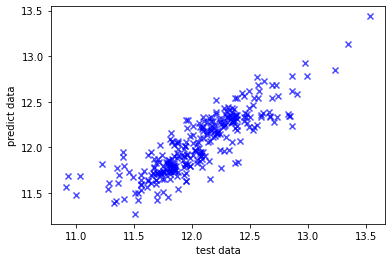

In [17]:
import matplotlib.pyplot as plt

# テストデータと予測値を散布図にかけてみる。
plt.xlabel("test data")
plt.ylabel("predict data")
plt.scatter(y_test_scaled, y_pred, 
            marker="x", alpha=0.7, c="b")
plt.show

線形回帰できているように見える。

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)
y_pred_sklearn = model.predict(X_test_scaled)
y_pred_sklearn

array([11.94534524, 11.84198623, 12.33109536, 11.71860872, 11.95319664,
       11.81928986, 11.69607971, 11.80414597, 12.269045  , 11.92234996,
       11.49758059, 11.71537194, 11.73296951, 11.72719382, 12.16255976,
       11.79649777, 11.64385768, 11.96964056, 12.31413885, 11.81208695,
       12.72659166, 11.62922638, 12.05398833, 11.74123037, 12.01834483,
       11.74322828, 11.65202589, 12.10308414, 11.6863663 , 12.18095835,
       12.16862387, 11.71376993, 11.84514087, 11.71457093, 11.88335911,
       12.17802789, 12.61313076, 11.60871933, 11.69996805, 12.67971052,
       12.35410856, 12.29334032, 12.06440705, 11.92121729, 12.4290239 ,
       11.695183  , 12.1858972 , 11.71210675, 11.60871933, 11.78990316,
       11.79743032, 11.87172251, 11.67496436, 12.09499065, 11.64841548,
       12.07017531, 12.32913328, 12.22947426, 11.7023291 , 11.56094455,
       12.03920759, 12.27144495, 12.33373741, 12.27797226, 11.45605825,
       12.22164384, 11.54295236, 12.22492695, 12.06000612, 11.76

<function matplotlib.pyplot.show(*args, **kw)>

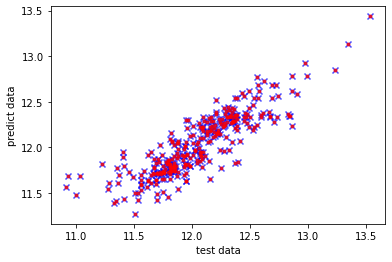

In [19]:
# sklearnの予測値も散布図で出してみる
plt.xlabel("test data")
plt.ylabel("predict data")
plt.scatter(y_test_scaled, y_pred, 
            marker="x", alpha=0.7, c="b")
plt.scatter(y_test_scaled, y_pred_sklearn, 
            marker=".", alpha=0.7, c="r")
plt.show

おおよそ一致している。正しく実装できたと思われる。

### 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

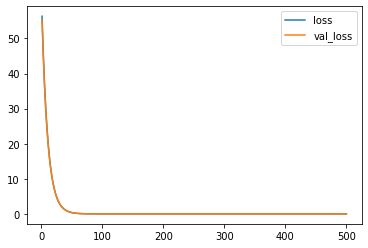

In [20]:
x = np.arange(1, len(model.loss)+1)
plt.plot(x, model.loss, label="loss")
plt.plot(x, model.val_loss, label="val_loss")
plt.legend()
plt.show()

### 【問題8】（アドバンス課題）バイアス項の除去
バイアス項$\theta_0$を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [21]:
model_2 = ScratchLinearRegression(num_iter=500, lr=0.05, no_bias=True, verbose=True)
model_2.fit(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

iter:0 [train_loss:7.269426e+01]
iter:0 [val_loss:7.248677e+01]
iter:1 [train_loss:7.264053e+01]
iter:1 [val_loss:7.246487e+01]
iter:2 [train_loss:7.259283e+01]
iter:2 [val_loss:7.244690e+01]
iter:3 [train_loss:7.255048e+01]
iter:3 [val_loss:7.243231e+01]
iter:4 [train_loss:7.251287e+01]
iter:4 [val_loss:7.242060e+01]
iter:5 [train_loss:7.247946e+01]
iter:5 [val_loss:7.241136e+01]
iter:6 [train_loss:7.244978e+01]
iter:6 [val_loss:7.240422e+01]
iter:7 [train_loss:7.242341e+01]
iter:7 [val_loss:7.239887e+01]
iter:8 [train_loss:7.239996e+01]
iter:8 [val_loss:7.239502e+01]
iter:9 [train_loss:7.237912e+01]
iter:9 [val_loss:7.239243e+01]
iter:10 [train_loss:7.236059e+01]
iter:10 [val_loss:7.239090e+01]
iter:11 [train_loss:7.234411e+01]
iter:11 [val_loss:7.239024e+01]
iter:12 [train_loss:7.232945e+01]
iter:12 [val_loss:7.239031e+01]
iter:13 [train_loss:7.231640e+01]
iter:13 [val_loss:7.239096e+01]
iter:14 [train_loss:7.230479e+01]
iter:14 [val_loss:7.239209e+01]
iter:15 [train_loss:7.229445e+

iter:457 [train_loss:7.220812e+01]
iter:457 [val_loss:7.243644e+01]
iter:458 [train_loss:7.220812e+01]
iter:458 [val_loss:7.243644e+01]
iter:459 [train_loss:7.220812e+01]
iter:459 [val_loss:7.243644e+01]
iter:460 [train_loss:7.220812e+01]
iter:460 [val_loss:7.243644e+01]
iter:461 [train_loss:7.220812e+01]
iter:461 [val_loss:7.243644e+01]
iter:462 [train_loss:7.220812e+01]
iter:462 [val_loss:7.243644e+01]
iter:463 [train_loss:7.220812e+01]
iter:463 [val_loss:7.243644e+01]
iter:464 [train_loss:7.220812e+01]
iter:464 [val_loss:7.243644e+01]
iter:465 [train_loss:7.220812e+01]
iter:465 [val_loss:7.243644e+01]
iter:466 [train_loss:7.220812e+01]
iter:466 [val_loss:7.243644e+01]
iter:467 [train_loss:7.220812e+01]
iter:467 [val_loss:7.243644e+01]
iter:468 [train_loss:7.220812e+01]
iter:468 [val_loss:7.243644e+01]
iter:469 [train_loss:7.220812e+01]
iter:469 [val_loss:7.243644e+01]
iter:470 [train_loss:7.220812e+01]
iter:470 [val_loss:7.243644e+01]
iter:471 [train_loss:7.220812e+01]
iter:471 [val

In [22]:
y_pred_2 = model_2.predict(X_test_scaled)
y_pred_2

array([-0.06991382, -0.17327283,  0.3158363 , -0.29665034, -0.06206242,
       -0.1959692 , -0.31917935, -0.21111309,  0.25378594, -0.0929091 ,
       -0.51767848, -0.29988713, -0.28228955, -0.28806524,  0.1473007 ,
       -0.21876129, -0.37140139, -0.0456185 ,  0.29887979, -0.20317212,
        0.7113326 , -0.38603268,  0.03872927, -0.27402869,  0.00308576,
       -0.27203078, -0.36323317,  0.08782508, -0.32889277,  0.16569928,
        0.15336481, -0.30148914, -0.17011819, -0.30068813, -0.13189995,
        0.16276883,  0.5978717 , -0.40653973, -0.31529102,  0.66445146,
        0.3388495 ,  0.27808126,  0.04914798, -0.09404177,  0.41376484,
       -0.32007607,  0.17063814, -0.30315231, -0.40653973, -0.2253559 ,
       -0.21782875, -0.14353655, -0.3402947 ,  0.07973159, -0.36684358,
        0.05491625,  0.31387422,  0.2142152 , -0.31292997, -0.45431452,
        0.02394853,  0.25618589,  0.31847834,  0.2627132 , -0.55920081,
        0.20638478, -0.4723067 ,  0.20966789,  0.04474706, -0.24

<function matplotlib.pyplot.show(*args, **kw)>

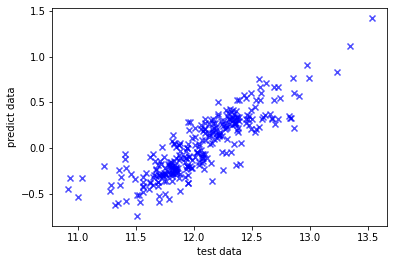

In [23]:
plt.xlabel("test data")
plt.ylabel("predict data")
plt.scatter(y_test_scaled, y_pred_2, 
            marker="x", alpha=0.7, c="b")
plt.show

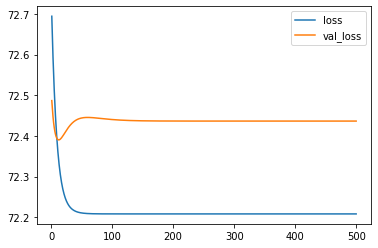

In [24]:
x = np.arange(1, len(model_2.loss)+1)
plt.plot(x, model_2.loss, label="loss")
plt.plot(x, model_2.val_loss, label="val_loss")
plt.legend()
plt.show()

In [25]:
print(model.coef_)
print(model_2.coef_)

[12.01525906  0.23843366  0.18730454]
[0.23843366 0.18730454]


In [26]:
lr_2 = LinearRegression(fit_intercept=False)
lr_2.fit(X_train_scaled, y_train_scaled)
y_pred_sklearn_2 = lr_2.predict(X_test_scaled)
y_pred_sklearn_2

array([-0.06991382, -0.17327283,  0.3158363 , -0.29665034, -0.06206242,
       -0.19596921, -0.31917935, -0.21111309,  0.25378594, -0.0929091 ,
       -0.51767848, -0.29988713, -0.28228955, -0.28806524,  0.1473007 ,
       -0.21876129, -0.37140139, -0.0456185 ,  0.29887979, -0.20317212,
        0.7113326 , -0.38603268,  0.03872927, -0.27402869,  0.00308576,
       -0.27203078, -0.36323317,  0.08782508, -0.32889277,  0.16569928,
        0.15336481, -0.30148914, -0.1701182 , -0.30068813, -0.13189995,
        0.16276883,  0.5978717 , -0.40653973, -0.31529102,  0.66445146,
        0.3388495 ,  0.27808126,  0.04914798, -0.09404177,  0.41376484,
       -0.32007607,  0.17063814, -0.30315231, -0.40653973, -0.2253559 ,
       -0.21782875, -0.14353655, -0.3402947 ,  0.07973159, -0.36684358,
        0.05491625,  0.31387422,  0.2142152 , -0.31292997, -0.45431452,
        0.02394853,  0.25618589,  0.31847834,  0.2627132 , -0.55920081,
        0.20638478, -0.4723067 ,  0.20966788,  0.04474706, -0.24

<function matplotlib.pyplot.show(*args, **kw)>

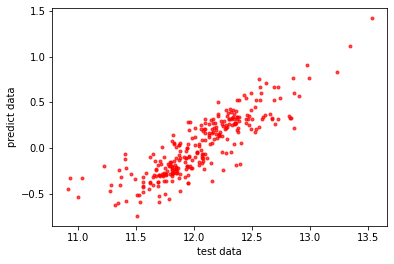

In [27]:
plt.xlabel("test data")
plt.ylabel("predict data")
plt.scatter(y_test_scaled, y_pred_sklearn_2, 
            marker=".", alpha=0.7, c="r")
plt.show

In [28]:
pd.DataFrame(y_test_scaled).describe()

,0
count,292.000000
mean,12.059218
std,0.397265
min,10.915088
25%,11.808110
50%,12.046486
75%,12.323522
max,13.534473


In [29]:
pd.DataFrame(y_pred_2).describe()

,0
count,292.000000
mean,0.024574
std,0.335593
min,-0.744632
25%,-0.232952
50%,-0.000602
75%,0.271453
max,1.422592


In [30]:
pd.DataFrame(y_pred_sklearn_2).describe()

,0
count,292.000000
mean,0.024574
std,0.335593
min,-0.744632
25%,-0.232952
50%,-0.000602
75%,0.271453
max,1.422592


結果としては、テストデータに対して線形に予測は出来ているが予測値の値が全体的に小さい。
sklearnのモデルでも同様の結果となった。

#### 考察・調査
- 直線の係数(回帰係数)は同様に学習してくれるが、必ず原点を通るような直線(平均が0付近)になってしまうと思われる。そのため予測値はバイアス項分、小さい値となる。
- なぜ標準偏差が同じ値にならないのが少し気になる。分布の仕方が同じでも絶対値が異なると標準偏差も変わるのだろうか。

### 【問題9】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

In [31]:
model.fit(X_train_scaled**2, y_train_scaled, X_test_scaled**2, y_test_scaled)

iter:0 [train_loss:3.697755e+01]
iter:0 [val_loss:3.559291e+01]
iter:1 [train_loss:3.282570e+01]
iter:1 [val_loss:3.191939e+01]
iter:2 [train_loss:2.944543e+01]
iter:2 [val_loss:2.894653e+01]
iter:3 [train_loss:2.666222e+01]
iter:3 [val_loss:2.650988e+01]
iter:4 [train_loss:2.434324e+01]
iter:4 [val_loss:2.448401e+01]
iter:5 [train_loss:2.238705e+01]
iter:5 [val_loss:2.277365e+01]
iter:6 [train_loss:2.071605e+01]
iter:6 [val_loss:2.130664e+01]
iter:7 [train_loss:1.927074e+01]
iter:7 [val_loss:2.002845e+01]
iter:8 [train_loss:1.800544e+01]
iter:8 [val_loss:1.889799e+01]
iter:9 [train_loss:1.688499e+01]
iter:9 [val_loss:1.788426e+01]
iter:10 [train_loss:1.588225e+01]
iter:10 [val_loss:1.696394e+01]
iter:11 [train_loss:1.497621e+01]
iter:11 [val_loss:1.611943e+01]
iter:12 [train_loss:1.415054e+01]
iter:12 [val_loss:1.533746e+01]
iter:13 [train_loss:1.339251e+01]
iter:13 [val_loss:1.460799e+01]
iter:14 [train_loss:1.269210e+01]
iter:14 [val_loss:1.392340e+01]
iter:15 [train_loss:1.204139e+

iter:449 [train_loss:7.760823e-02]
iter:449 [val_loss:7.168060e-02]
iter:450 [train_loss:7.760823e-02]
iter:450 [val_loss:7.168052e-02]
iter:451 [train_loss:7.760823e-02]
iter:451 [val_loss:7.168045e-02]
iter:452 [train_loss:7.760823e-02]
iter:452 [val_loss:7.168037e-02]
iter:453 [train_loss:7.760823e-02]
iter:453 [val_loss:7.168030e-02]
iter:454 [train_loss:7.760823e-02]
iter:454 [val_loss:7.168023e-02]
iter:455 [train_loss:7.760823e-02]
iter:455 [val_loss:7.168016e-02]
iter:456 [train_loss:7.760823e-02]
iter:456 [val_loss:7.168010e-02]
iter:457 [train_loss:7.760823e-02]
iter:457 [val_loss:7.168003e-02]
iter:458 [train_loss:7.760823e-02]
iter:458 [val_loss:7.167997e-02]
iter:459 [train_loss:7.760823e-02]
iter:459 [val_loss:7.167991e-02]
iter:460 [train_loss:7.760823e-02]
iter:460 [val_loss:7.167984e-02]
iter:461 [train_loss:7.760823e-02]
iter:461 [val_loss:7.167979e-02]
iter:462 [train_loss:7.760823e-02]
iter:462 [val_loss:7.167973e-02]
iter:463 [train_loss:7.760823e-02]
iter:463 [val

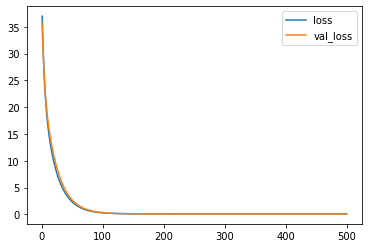

<function matplotlib.pyplot.show(*args, **kw)>

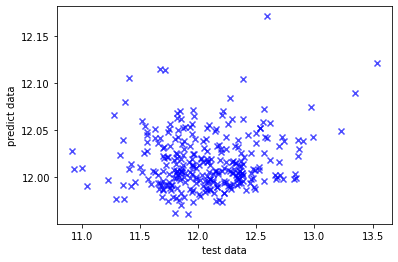

In [32]:
x = np.arange(1, len(model.loss)+1)
plt.plot(x, model.loss, label="loss")
plt.plot(x, model.val_loss, label="val_loss")
plt.legend()
plt.show()

y_pred_3 = model.predict(X_test_scaled)

plt.xlabel("test data")
plt.ylabel("predict data")
plt.scatter(y_test_scaled, y_pred_3, 
            marker="x", alpha=0.7, c="b")
plt.show

損失関数は順調に減少しているが、予測が線形にできていない。

In [33]:
model.fit(X_train_scaled**3, y_train_scaled, X_test_scaled**3, y_test_scaled)

iter:0 [train_loss:1.565852e+02]
iter:0 [val_loss:8.302192e+01]
iter:1 [train_loss:2.106924e+04]
iter:1 [val_loss:8.600008e+03]
iter:2 [train_loss:4.173481e+06]
iter:2 [val_loss:1.672537e+06]
iter:3 [train_loss:8.284358e+08]
iter:3 [val_loss:3.323201e+08]
iter:4 [train_loss:1.644460e+11]
iter:4 [val_loss:6.596189e+10]
iter:5 [train_loss:3.264284e+13]
iter:5 [val_loss:1.309361e+13]
iter:6 [train_loss:6.479664e+15]
iter:6 [val_loss:2.599106e+15]
iter:7 [train_loss:1.286225e+18]
iter:7 [val_loss:5.159273e+17]
iter:8 [train_loss:2.553181e+20]
iter:8 [val_loss:1.024125e+20]
iter:9 [train_loss:5.068112e+22]
iter:9 [val_loss:2.032907e+22]
iter:10 [train_loss:1.006030e+25]
iter:10 [val_loss:4.035359e+24]
iter:11 [train_loss:1.996987e+27]
iter:11 [val_loss:8.010262e+26]
iter:12 [train_loss:3.964057e+29]
iter:12 [val_loss:1.590052e+29]
iter:13 [train_loss:7.868726e+31]
iter:13 [val_loss:3.156282e+31]
iter:14 [train_loss:1.561957e+34]
iter:14 [val_loss:6.265279e+33]
iter:15 [train_loss:3.100513e+

iter:384 [train_loss:nan]
iter:384 [val_loss:nan]
iter:385 [train_loss:nan]
iter:385 [val_loss:nan]
iter:386 [train_loss:nan]
iter:386 [val_loss:nan]
iter:387 [train_loss:nan]
iter:387 [val_loss:nan]
iter:388 [train_loss:nan]
iter:388 [val_loss:nan]
iter:389 [train_loss:nan]
iter:389 [val_loss:nan]
iter:390 [train_loss:nan]
iter:390 [val_loss:nan]
iter:391 [train_loss:nan]
iter:391 [val_loss:nan]
iter:392 [train_loss:nan]
iter:392 [val_loss:nan]
iter:393 [train_loss:nan]
iter:393 [val_loss:nan]
iter:394 [train_loss:nan]
iter:394 [val_loss:nan]
iter:395 [train_loss:nan]
iter:395 [val_loss:nan]
iter:396 [train_loss:nan]
iter:396 [val_loss:nan]
iter:397 [train_loss:nan]
iter:397 [val_loss:nan]
iter:398 [train_loss:nan]
iter:398 [val_loss:nan]
iter:399 [train_loss:nan]
iter:399 [val_loss:nan]
iter:400 [train_loss:nan]
iter:400 [val_loss:nan]
iter:401 [train_loss:nan]
iter:401 [val_loss:nan]
iter:402 [train_loss:nan]
iter:402 [val_loss:nan]
iter:403 [train_loss:nan]
iter:403 [val_loss:nan]


/home/timanishi/.pyenv/versions/3.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:182: RuntimeWarning: overflow encountered in square
/home/timanishi/.pyenv/versions/3.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:184: RuntimeWarning: overflow encountered in double_scalars
/home/timanishi/.pyenv/versions/3.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:161: RuntimeWarning: invalid value encountered in subtract


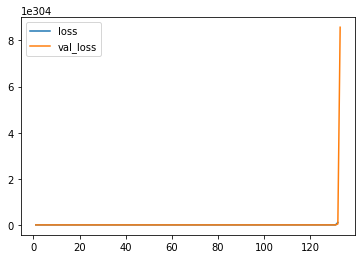

<function matplotlib.pyplot.show(*args, **kw)>

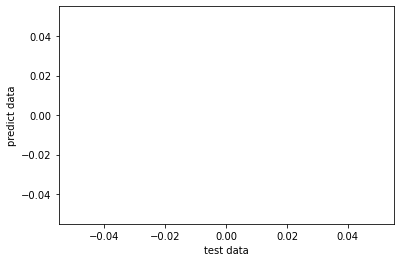

In [34]:
x = np.arange(1, len(model.loss)+1)
plt.plot(x, model.loss, label="loss")
plt.plot(x, model.val_loss, label="val_loss")
plt.legend()
plt.show()

y_pred_4 = model.predict(X_test_scaled)

plt.xlabel("test data")
plt.ylabel("predict data")
plt.scatter(y_test_scaled, y_pred_4, 
            marker="x", alpha=0.7, c="b")
plt.show

損失関数が発散し、予測結果もnanになってしまった。

### 【問題10】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。

$$
\theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^m[(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}]
$$

以下の式から説明をはじめることができます。

$$
\theta_j:=\theta_j-\frac{\partial}{\partial\theta_j}J(\theta)
$$

目的関数（損失関数）$\theta_j$は次の式です。

$$
J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2
$$

#### 導出過程

$$
\theta_j:=\theta_j-\frac{\partial}{\partial\theta_j}J(\theta) \\
:=\theta_j-\frac{\partial}{\partial\theta_j}\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2
$$

ここで、以下を定義する。

$$
h_\theta(x)=\theta_0x_0+\theta_1x_1+...+\theta_jx_j+...+\theta_nx_n(x_0=1) ・・・① \\
u=h_{\theta}(x^{(i)})-y^{(i)}　・・・② \\
$$

もとの式に適用する。

$$
\theta_j:=\theta_j-\frac{1}{2m}\sum_{i=1}^m\frac{\partial}{\partial\theta_j}u^2
$$

$\frac{\partial}{\partial\theta_j}u^2$について計算する。

$$
\frac{\partial}{\partial\theta_j}u^2=\frac{\partial u}{\partial\theta_j}\frac{u^2}{\partial u} \\
$$

①、②より、$①'$が求まる。

$$
\frac{\partial u}{\partial \theta_j}=x_j　・・・　①'
$$

つまり、

$$
\frac{\partial}{\partial\theta_j}u^2=2ux_j
$$

よって、

$$
\theta_j:=\theta_j-\frac{1}{2m}\sum_{i=1}^m2ux_j^{(i)} \\
:=\theta_j-\frac{1}{m}\sum_{i=1}^m[(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}]
$$

$\theta_j$から誤差に関する項を減算しており、その大きさを学習率$\alpha$で調整するため、二項目に掛け合わせる。

$$
\theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^m[(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}]
$$

### 【問題11】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

#### 説明
回帰係数を計算するために微分する目的関数について、局所解が存在するような非線形関数だと全体最適解が求まらないことがあるため。
今回使用する線形回帰のモデルは線形であるため目的関数も線形になり、全体最適解が求まるようになっている。

例として、1元１次方程式(直線)・1元3次方程式(曲線)を考えてみる。

- 1元1次方程式(直線)
$$
f_1(x)=ax+b
$$

- 1元4次方程式(曲線)
$$
f_3(x)=ax^4+bx^3+cx^2+dx+e
$$

それぞれのグラフは以下のとおりである。

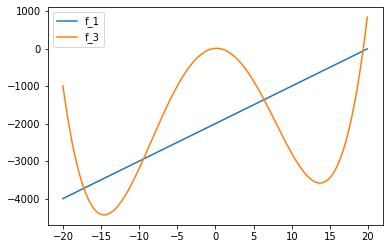

In [104]:
# 各項の係数の大きさに意味はない
f_1 = lambda x: 100*x - 2000
f_3 = lambda x: 0.1*(x**4) + 0.1*(x**3) - 40*(x**2) + 10*x + 5

x = np.arange(-20, 20, 0.1)

plt.plot(x, f_1(x), label="f_1")
plt.plot(x, f_3(x), label="f_3")
plt.legend()
plt.show()

１次式だと、次元数が増えて線でなくなり平面(超平面)になったとしても、損失関数は線形になる。
次元数が増えてくると、グラフに示したとおり局所最適解が複数存在し(グラフだと2つ)、大域的最適解(グラフだと$x=-15$あたりの箇所)が求まらない場合がある。

[(参照した記事1)](https://jp.mathworks.com/help/optim/ug/local-vs-global-optima.html)
[(参照した記事2)](https://www.slideshare.net/yasunoriozaki12/prml-29439402)
[(参照した記事3)](http://bin.t.u-tokyo.ac.jp/startup16/file/3-1.pdf)